In [1]:
import sys 
sys.path.append('../')
import_path = './exports/'

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN, AffinityPropagation, KMeans
import Helpers.helpers as help

def models(): 
    return {
        'KMeans': KMeans(n_clusters=4, init='random', algorithm='lloyd'),
        'AffinityPropagation': AffinityPropagation(damping=0.5, affinity='euclidean'),
        'DBSCAN': DBSCAN(min_samples=6, metric='euclidean')
    }



In [3]:
epsilons = help.get_experiment_epsilons()
epsilons

[0.05, 0.1, 0.5, 1, 2, 3, 5, 7, 9]

In [4]:
plain_df, perturbed_df = help.load_plain_and_perturbed_dataset(epsilons[0], import_path)
print(plain_df.shape, perturbed_df.shape)

(200, 3) (200, 3)


In [5]:
supported_models = list(models().values())
print(supported_models)

[KMeans(init='random', n_clusters=4), AffinityPropagation(), DBSCAN(min_samples=6)]


In [6]:
external_report = help.generate_external_validity_export(epsilons, supported_models, n_times=10, import_path=import_path)
external_report.to_csv('./exports/results/utility-3d.csv')

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff8f5bf430>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff8f5bf430>
Traceback 

## Report

In [7]:
utility_metrics = help.load_dataset('./exports/results/utility-3d.csv')
utility_metrics.head()

,type,epsilon,ari,ami,ch,sc
0,"KMeans(clusters=4, init=random)",0.05,0.006948,0.005939,62.713661,0.266265
1,"AffinityPropagation(damping=0.5, distance_metr...",0.05,0.007999,0.018861,53.018803,0.251216
2,"DBSCAN(samples=6, distance_metric=euclidean, e...",0.05,0.003912,0.010381,2.388965,-0.040113
3,"KMeans(clusters=4, init=random)",0.10,-0.004607,-0.002990,58.691645,0.239888
4,"AffinityPropagation(damping=0.5, distance_metr...",0.10,0.008579,0.003336,51.141360,0.261660


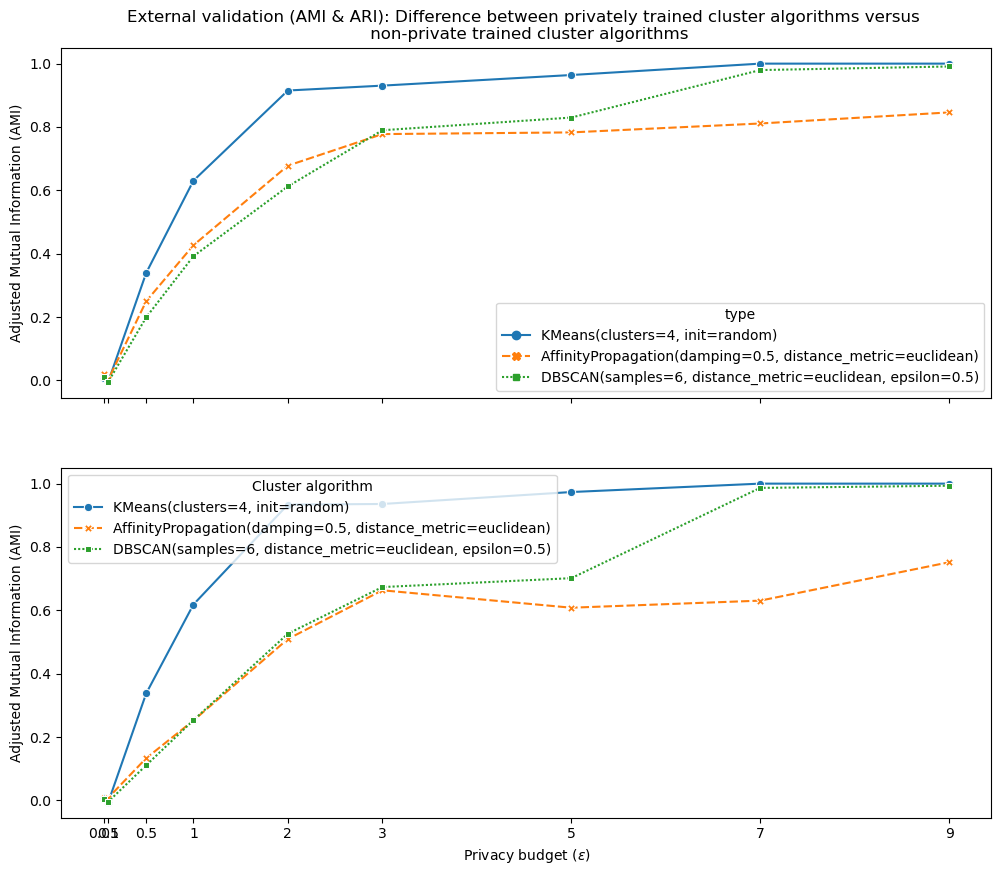

In [10]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12, 10))
help.plot_utility(utility_metrics, help.get_experiment_epsilons(), 'ami', axes=axs[0])
help.plot_utility(utility_metrics, help.get_experiment_epsilons(), 'ari', axes=axs[1], title='')
fig.savefig('./exports/results/ami-and-ari.png')